In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler

import nltk

from scipy import interpolate


# tagged = nltk.pos_tag(tokens)
tagged[0:6]

# Localからテキストを読み込む

In [2]:
#author = ['Poe', 'Twain', 'AB', 'CD', 'NH', 'OH', 'WI','HG','RK','GW','KM','SC','JL','AE','PG','LM','SK','AC','FA','HL']

In [3]:
#homePC
#path_0 = Path(r'C:\Users\SI\Python_ML\python_NLTK\NLTK_')

#officePC
path_0 = Path(r'C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_')

#prep values
prep_list = ['and', 'the', 'of', 'that', 'was', 'upon', 'not', 'when', 'then']
label_list = [4,3,2,1,1,1,1,1,1]

#author labels
author = ['Poe', 'CD']
type_ = ['letter', 'story']
label_num = 3



choice = [0,1]

index_i = 1
index_j = 1

path = str(path_0) + str('/') + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
print(path)

C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_/CD-story


In [4]:
new_dir_path_csv = 'csv/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
new_dir_path_png = 'png/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

author_type = str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

new_dir_path_png_top = 'png/' + author_type + '/top_ranking'
new_dir_path_png_top_no_punc = 'png/' + author_type + '/top_ranking_no_punc'
new_dir_path_png_top_no_punc_no_stopwords = 'png/' + author_type + '/top_ranking_no_punc_no_stopwords'
new_dir_path_png_dispersion_plot = 'png/' + author_type + '/dispersion_plot'
new_dir_path_png_biagram_plot  = 'png/' + author_type + '/biagram_plot'

def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)

my_makedirs(new_dir_path_csv)
my_makedirs(new_dir_path_png)
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)
my_makedirs(new_dir_path_png_top_no_punc_no_stopwords)

my_makedirs(new_dir_path_png_dispersion_plot)
my_makedirs(new_dir_path_png_biagram_plot)

In [5]:
new_dir_path_csv, new_dir_path_png, new_dir_path_png_top, new_dir_path_png_top_no_punc, new_dir_path_png_top_no_punc_no_stopwords,new_dir_path_png_dispersion_plot, new_dir_path_png_biagram_plot

('csv/CD-story',
 'png/CD-story',
 'png/CD-story/top_ranking',
 'png/CD-story/top_ranking_no_punc',
 'png/CD-story/top_ranking_no_punc_no_stopwords',
 'png/CD-story/dispersion_plot',
 'png/CD-story/biagram_plot')

In [6]:
#path = Path(r'C:\Users\tsuka\Desktop\txt')
#path = Path(r'C:\Users\SI\Python_ML\NLTK_\txt\Poe-story')
path = Path(path)
path
path.glob('*.txt')
list(path.glob('*.txt'))
print('lists:', path.glob('*.txt'))
#list path
path = list(path.glob('*.txt'))
path


lists: <generator object Path.glob at 0x000001E981A30748>


[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-01.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-02.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-03.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-04.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-05.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-06.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-07.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-08.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-09.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-10.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD-story/cd-11.txt'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/NLTK_/CD

In [7]:
data = pd.read_table(path[0], encoding='cp932')#encoding="utf-8"

#data = pd.read_table(path[11], encoding='euc_jp')#encoding="utf-8"
data

,p. 309THE LONG VOYAGE
0,When the wind is blowing and the sleet or rain...
1,Sitting on my ruddy hearth in the twilight of ...
2,A shadow on the wall in which my mind｡ｯs eye c...
3,Captain Bligh (a worse man to be entrusted wit...
4,"See the Halsewell, East Indiaman outward bound..."
5,｡ｮAbout two in the morning of Friday the sixth...
6,"｡ｮAt this dreadful moment, the ship struck, wi..."
7,"｡ｮMany of the seamen, who had been remarkably ..."
8,｡ｮThe ship continued to beat on the rocks; and...
9,"｡ｮMr. Meriton, at this crisis, offered to thes..."


# テキストの内容をリスト化１

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Si\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import nltk

file_content = open(path[0]).read()
tokens = nltk.word_tokenize(file_content)
tokens

['p.',
 '309THE',
 'LONG',
 'VOYAGE',
 'When',
 'the',
 'wind',
 'is',
 'blowing',
 'and',
 'the',
 'sleet',
 'or',
 'rain',
 'is',
 'driving',
 'against',
 'the',
 'dark',
 'windows',
 ',',
 'I',
 'love',
 'to',
 'sit',
 'by',
 'the',
 'fire',
 ',',
 'thinking',
 'of',
 'what',
 'I',
 'have',
 'read',
 'in',
 'books',
 'of',
 'voyage',
 'and',
 'travel',
 '.',
 'Such',
 'books',
 'have',
 'had',
 'a',
 'strong',
 'fascination',
 'for',
 'my',
 'mind',
 'from',
 'my',
 'earliest',
 'childhood',
 ';',
 'and',
 'I',
 'wonder',
 'it',
 'should',
 'have',
 'come',
 'to',
 'pass',
 'that',
 'I',
 'never',
 'have',
 'been',
 'round',
 'the',
 'world',
 ',',
 'never',
 'have',
 'been',
 'shipwrecked',
 ',',
 'ice-environed',
 ',',
 'tomahawked',
 ',',
 'or',
 'eaten',
 '.',
 'Sitting',
 'on',
 'my',
 'ruddy',
 'hearth',
 'in',
 'the',
 'twilight',
 'of',
 'New',
 'Year｡ｯs',
 'Eve',
 ',',
 'I',
 'find',
 'incidents',
 'of',
 'travel',
 'rise',
 'around',
 'me',
 'from',
 'all',
 'the',
 'latit

In [10]:
len(tokens)

4372

# テキストの内容をリスト化2

# txtをローカルから読み込む

In [11]:
read_book_list = []
for i in range(len(path)):
    try:
        #data = pd.read_table(path[i], encoding='cp932')
        data = pd.read_table(path[i], encoding='cp932')
        file_name = os.path.splitext(os.path.basename(path[i]))[0]
        print(i, path[i])

        file_content = open(path[i]).read()
        read_book = nltk.word_tokenize(file_content)

        print(i, len(read_book))

        #read_book = nltk.corpus.gutenberg.words(book_list[i])
        read_book_list.append(read_book)
        #print('No.',i,'\n', read_book_list, '\n')
        
    except UnicodeDecodeError:
        print('cp932 codec cant decode some positions in_', file_name,'_Try other files')
        continue

0 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-01.txt
0 4372
1 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-02.txt
1 3587
2 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-03.txt
2 1449
3 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-04.txt
3 4030
4 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-05.txt
4 6243
5 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-06.txt
5 5673
6 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-07.txt
6 2236
7 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-08.txt
7 3353
8 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-09.txt
8 3118
9 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-10.txt
9 3333
10 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-11.txt
10 4029
11 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-12.txt
11 2908
12 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-13.txt
1

In [12]:
#check

# 変な符号を置き換え

In [13]:
for i in range(len(path)):
    for j in range(len(read_book_list[i])):
        s = read_book_list[i][j]
        read_book_list[i][j] = s.translate(str.maketrans({'乬': None, '乭': None, '乫': None, '乪': None, 'ｪ': None, '｡':None, 'ｰ':None, 'ｱ':None }))
    print('No.',i,'\n', read_book_list[i], '\n')

No. 0 
 ['p.', '309THE', 'LONG', 'VOYAGE', 'When', 'the', 'wind', 'is', 'blowing', 'and', 'the', 'sleet', 'or', 'rain', 'is', 'driving', 'against', 'the', 'dark', 'windows', ',', 'I', 'love', 'to', 'sit', 'by', 'the', 'fire', ',', 'thinking', 'of', 'what', 'I', 'have', 'read', 'in', 'books', 'of', 'voyage', 'and', 'travel', '.', 'Such', 'books', 'have', 'had', 'a', 'strong', 'fascination', 'for', 'my', 'mind', 'from', 'my', 'earliest', 'childhood', ';', 'and', 'I', 'wonder', 'it', 'should', 'have', 'come', 'to', 'pass', 'that', 'I', 'never', 'have', 'been', 'round', 'the', 'world', ',', 'never', 'have', 'been', 'shipwrecked', ',', 'ice-environed', ',', 'tomahawked', ',', 'or', 'eaten', '.', 'Sitting', 'on', 'my', 'ruddy', 'hearth', 'in', 'the', 'twilight', 'of', 'New', 'Yearｯs', 'Eve', ',', 'I', 'find', 'incidents', 'of', 'travel', 'rise', 'around', 'me', 'from', 'all', 'the', 'latitudes', 'and', 'longitudes', 'of', 'the', 'globe', '.', 'They', 'observe', 'no', 'order', 'or', 'sequence

No. 24 
 ['p.', '494A', 'MONUMENT', 'OF', 'FRENCH', 'FOLLY', 'It', 'was', 'profoundly', 'observed', 'by', 'a', 'witty', 'member', 'of', 'the', 'Court', 'of', 'Common', 'Council', ',', 'in', 'Council', 'assembled', 'in', 'the', 'City', 'of', 'London', ',', 'in', 'the', 'year', 'of', 'our', 'Lord', 'one', 'thousand', 'eight', 'hundred', 'and', 'fifty', ',', 'that', 'the', 'French', 'are', 'a', 'frog-eating', 'people', ',', 'who', 'wear', 'wooden', 'shoes', '.', 'We', 'are', 'credibly', 'informed', ',', 'in', 'reference', 'to', 'the', 'nation', 'whom', 'this', 'choice', 'spirit', 'so', 'happily', 'disposed', 'of', ',', 'that', 'the', 'caricatures', 'and', 'stage', 'representations', 'which', 'were', 'current', 'in', 'England', 'some', 'half', 'a', 'century', 'ago', ',', 'exactly', 'depict', 'their', 'present', 'condition', '.', 'For', 'example', ',', 'we', 'understand', 'that', 'every', 'Frenchman', ',', 'without', 'exception', ',', 'wears', 'a', 'pigtail', 'and', 'curl-papers', '.', 'Tha

In [14]:
for i in range(len(path)):
    read_book_array = np.array(read_book_list[i])
    print("No.",i,"sample:", read_book_array.shape, len(read_book_list), path[i])

No. 0 sample: (4372,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-01.txt
No. 1 sample: (3587,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-02.txt
No. 2 sample: (1449,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-03.txt
No. 3 sample: (4030,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-04.txt
No. 4 sample: (6243,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-05.txt
No. 5 sample: (5673,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-06.txt
No. 6 sample: (2236,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-07.txt
No. 7 sample: (3353,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-08.txt
No. 8 sample: (3118,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-09.txt
No. 9 sample: (3333,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\NLTK_\CD-story\cd-10.txt
No. 10 sample: (4029,) 49 C:\Users\Si\Desktop\python_all\python_NLTK\N

# texts analysis

# 

In [15]:

len(read_book_list)

49

In [16]:

def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)

In [17]:

def slide_win(w,s, array):
    array = list(array)
    slided_array = [array[i:i+w] for i in range(0,len(array)-w+s,s)]
    return slided_array

In [18]:
win_len = 600
silde_perwin = 100

In [19]:
for jdx_, label in enumerate(label_list):
    print(jdx_, label)

0 4
1 3
2 2
3 1
4 1
5 1
6 1
7 1
8 1


In [20]:
#指定された助動詞の場所を時系列的に整理
df_time_list = []
for idx in range(len(read_book_list)):
    #print(idx, read_book_list[idx])
    
    word_list = []
    for word in read_book_list[idx]:
        #print(word, type(word))
        if word.isalpha():
            #print(word)
            word_list.append(word)
    time_series = np.full(len(word_list),0)
    #time_series

    
    for jdx_, label in enumerate(label_list):
        
        index_list_sub = []
        for index in range(len(word_list)):
            #print(index, word_list[index])
            if word_list[index] == prep_list[jdx_]:
                #print(index)
                index_list_sub.append(index)

            
        for j in index_list_sub:
            time_series[j] = label
            
    #print(time_series)
    
    print(idx, time_series)
    if len(time_series) < win_len:
        continue
    else:
        
        new_array = slide_win(win_len, silde_perwin, time_series)
        
        for k in new_array:
            
            time_series = k
            df_time = pd.DataFrame(time_series).T
            df_time['LABEL'] = label_num

            #x = list(df_time.columns)
            #y = list(time_series)

            df_time_list.append(df_time)

0 [0 0 0 ... 0 0 0]
1 [0 0 0 ... 2 0 0]
2 [0 0 0 ... 1 0 0]
3 [0 0 0 ... 0 0 0]
4 [0 0 0 ... 0 0 0]
5 [0 0 0 ... 0 0 0]
6 [0 0 0 ... 0 0 0]
7 [0 0 0 ... 0 0 0]
8 [0 0 0 ... 0 0 0]
9 [0 0 0 ... 0 0 0]
10 [0 0 0 ... 3 0 0]
11 [0 0 0 ... 0 0 0]
12 [0 0 0 ... 0 0 0]
13 [0 0 0 ... 0 0 0]
14 [0 0 0 ... 0 0 0]
15 [0 0 0 ... 0 0 0]
16 [0 0 0 ... 0 0 0]
17 [0 0 0 ... 0 0 0]
18 [0 0 0 ... 0 0 0]
19 [0 0 0 ... 0 0 0]
20 [0 0 0 ... 0 1 0]
21 [0 0 0 ... 0 0 0]
22 [0 0 0 ... 0 0 0]
23 [0 0 0 ... 0 0 0]
24 [0 0 0 ... 0 0 0]
25 [0 0 0 ... 0 0 0]
26 [0 0 0 ... 0 0 0]
27 [0 0 0 ... 0 0 0]
28 [0 0 0 ... 0 0 0]
29 [0 0 0 ... 0 0 0]
30 [0 0 0 ... 0 0 0]
31 [0 0 0 ... 0 2 0]
32 [0 0 0 ... 0 0 0]
33 [0 0 0 ... 0 3 0]
34 [0 0 0 ... 0 0 0]
35 [0 0 0 ... 0 0 0]
36 [0 0 0 ... 0 0 0]
37 [0 0 0 ... 0 0 0]
38 [0 0 0 ... 0 0 0]
39 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 2 3 0 0 2 0 0 4 0
 0 0 2 3 0 0 0 3 0 2 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [21]:
len(df_time_list)

1556

In [22]:
len(df_time_list)

1556

In [23]:
len(df_time_list)

1556

In [24]:
#for i in range(3):
#for i in range(len(df_time_list) ):
df_v = pd.concat([df_time_list[i] for i in range(len(df_time_list) )], axis=0)
df_v
df_v

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,LABEL
0,0,0,0,3,0,0,0,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3
0,0,2,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0,1,0,0,0,0,0,0,0,3,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0,0,0,0,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0,4,0,4,0,0,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,3,0,2,3,0,0,2,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0,0,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
0,0,0,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,3


In [25]:
df_v = df_v.fillna(0)

In [26]:
df_v = df_v.reset_index(drop=True)
df_v

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,LABEL
0,0,0,0,3,0,0,0,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3
1,0,2,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,1,0,0,0,0,0,0,0,3,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,0,0,0,4,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,4,0,4,0,0,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0,3,0,2,3,0,0,2,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1552,0,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1553,0,0,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3
1554,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,3


In [27]:
#preserve the timeseries dataset
def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)
        
path_time_series = './time_series_csv/' #+ str(author[choice[index_j]])
my_makedirs(path_time_series)

df_v.to_csv(path_time_series + '/' + str(author[choice[index_j]]) + '_timeseries.csv')

In [28]:
#merge csv between different authors

In [29]:
path_csv = Path(r'C:\Users\Si\Desktop\python_all\python_NLTK\nltk\time_series_csv')
path=list(path_csv.glob('*.csv'))

In [30]:
df_list = []
for i in path:
    df_ = pd.read_csv(i)
    df_list.append(df_)
df_list

[     Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  591  592  593  594  595  596  \
 0             0  0  0  0  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0   
 1             1  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  3.0   
 2             2  0  0  0  4  3  0  0  0  3  ...  4.0  0.0  0.0  0.0  0.0  0.0   
 3             3  0  0  0  0  3  0  0  2  3  ...  0.0  0.0  2.0  0.0  0.0  0.0   
 4             4  2  0  0  0  0  4  0  0  0  ...  1.0  3.0  0.0  0.0  0.0  0.0   
 ..          ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
 937         937  0  0  3  0  0  0  0  0  0  ...  0.0  3.0  0.0  0.0  0.0  0.0   
 938         938  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
 939         939  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
 940         940  0  0  0  0  0  0  0  0  0  ...  0.0  3.0  0.0  1.0  1.0  0.0   
 941         941  0  0  0  0  0  0  3  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
 
      597  598

In [31]:

df_concat = pd.concat([df_list[i] for i in range( len(df_list) )], axis=0)
df_concat
df_concat

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,591,592,593,594,595,596,597,598,599,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2
2,2,0,0,0,4,3,0,0,0,3,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3,0,0,0,0,3,0,0,2,3,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2
4,4,2,0,0,0,0,4,0,0,0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,554,0,0,0,0,0,0,0,0,0,...,4.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,1
555,555,0,3,0,4,0,0,0,0,3,...,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1
556,556,0,0,0,0,0,0,0,0,0,...,3.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1
557,557,0,0,0,0,0,0,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [32]:
df_concat = df_concat.reset_index(drop=True)
df_concat = df_concat.drop(df_concat.columns[0], axis = 1)
df_concat

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2
2,0,0,0,4,3,0,0,0,3,0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,3,0,0,2,3,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2
4,2,0,0,0,0,4,0,0,0,0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,1
5779,0,3,0,4,0,0,0,0,3,0,...,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1
5780,0,0,0,0,0,0,0,0,0,0,...,3.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1
5781,0,0,0,0,0,0,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [33]:
#preserve the timeseries dataset
def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)
        
path_time_series_merged = './time_series_csv/' + 'merged_csv'
my_makedirs(path_time_series_merged)

df_concat.to_csv(path_time_series_merged + '/' + 'all_timeseries.csv')

# 補間

In [34]:
#X-axis
len(list(df_time.columns)), list(df_time.columns)

(554,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157

In [35]:
#Y-axis
len(time_series), list(time_series)

(553,
 [0,
  0,
  0,
  0,
  3,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,

In [36]:
#補間
def spline1(x,y,point):
    f = interpolate.interp1d(x, y,kind="cubic") 
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

def spline2(x,y,point):
    f = interpolate.Akima1DInterpolator(x, y)
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

def spline3(x,y,point,deg):
    tck,u = interpolate.splprep([x,y],k=deg,s=0) 
    u = np.linspace(0,1,num=point,endpoint=True) 
    spline = interpolate.splev(u,tck)
    return spline[0],spline[1]

In [37]:
len(list(df_time.columns)), len(list(time_series))

(554, 553)

In [38]:
df_time

,0,1,2,3,4,5,6,7,8,9,...,544,545,546,547,548,549,550,551,552,LABEL
0,0,0,0,0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [39]:
df_time = df_time.drop('LABEL', axis = 1)

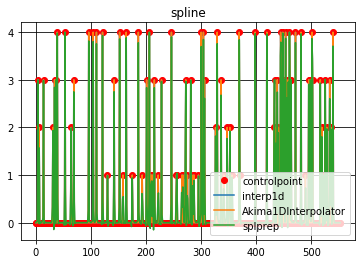

In [40]:
if __name__ == "__main__":
    #x座標に関して、重複、減少傾向を持つ座標群
    #x = [-5, -5, -3, 2, 3, 0, -2]
    #y = [6, 1, 6, 7, 1, -1, 0]

    #x方向に増加傾向である座標群
    #x = [-5, 0, 1,3,4,6]
    #y = [-4, 2, -2,-4,0,4]
    x = list(df_time.columns)
    y = list(time_series)


    a1,b1 = spline1(x,y,len(x)) #interp1dメソッドを実行
    a2,b2 = spline2(x,y,len(x)) #Akima1DInterpolatorメソッドを実行
    a3,b3 = spline3(x,y,len(x),3) #splprepメソッドを実行

    #グリッド線やラベルなどを付与しつつスプライン曲線をプロット
    plt.plot(x, y, 'ro',label="controlpoint")
    
    plt.plot(a1,b1,label="interp1d")
    plt.plot(a2,b2,label="Akima1DInterpolator")
    plt.plot(a3,b3,label="splprep")
    
    plt.title("spline")
    #plt.xlim([-10, 10])
    #plt.ylim([-10, 10])
    plt.legend(loc='lower right')
    plt.grid(which='major',color='black',linestyle='-')
    plt.grid(which='minor',color='black',linestyle='-')
    #plt.xticks(list(filter(lambda x: x%1==0, np.arange(-10,10))))
    #plt.yticks(list(filter(lambda x: x%1==0, np.arange(-10,10))))
    plt.show()

In [41]:
a1,b1

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [42]:
a2,b2

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [43]:
a3,b3

(array([-4.64758486e-17,  1.53060631e+00,  3.06441912e+00,  3.77990199e+00,
         3.99933020e+00,  4.36473244e+00,  4.96026293e+00,  5.68291380e+00,
         6.24106099e+00,  7.04938474e+00,  8.60423485e+00,  1.01381579e+01,
         1.16701263e+01,  1.31728153e+01,  1.38579780e+01,  1.40064242e+01,
         1.42055493e+01,  1.50428664e+01,  1.65944187e+01,  1.81287394e+01,
         1.96678245e+01,  2.12073609e+01,  2.27468250e+01,  2.42862636e+01,
         2.58258403e+01,  2.73665562e+01,  2.89013841e+01,  3.03277901e+01,
         3.09392009e+01,  3.13867023e+01,  3.25921309e+01,  3.37131136e+01,
         3.39877086e+01,  3.40523581e+01,  3.45614654e+01,  3.59668480e+01,
         3.67696779e+01,  3.69818046e+01,  3.73633648e+01,  3.79244083e+01,
         3.84547294e+01,  3.88423983e+01,  3.90125565e+01,  3.90631299e+01,
         3.94890278e+01,  4.07765516e+01,  4.23246080e+01,  4.38659339e+01,
         4.54053130e+01,  4.69447202e+01,  4.84837942e+01,  5.00234138e+01,
         5.1

In [44]:
cc

NameError: name 'cc' is not defined

In [ ]:
#pythonでは、文(text)はリスト配列で保存
len(read_book_list[0]), read_book_list[0]

In [ ]:
#指定された助動詞の場所を時系列的に整理

In [ ]:
word_list = []
for word in read_book_list[0]:
    #print(word, type(word))
    if word.isalpha():
        print(word)
        word_list.append(word)

In [ ]:
index_list0 = []
for index in range(len(word_list)):
    #print(index, word_list[index])
    if word_list[index] == prep_list[0]:
        print(index)
        index_list0.append(index)
    elif word_list[index] == prep_list[1]:
        print(index)
    elif word_list[index] == prep_list[3]:
        print(index)

In [ ]:
prep_list

In [ ]:
len(word_list), index_list0

In [ ]:
time_series = np.full(len(word_list),0)
time_series

In [ ]:
for i in index_list0:
    print(i)
    time_series[i] = 1
time_series

In [ ]:
df_time = pd.DataFrame(time_series).T
df_time['label'] = 1
df_time

In [ ]:
cc

In [ ]:
emma = nltk.Text(read_book_list[0])
emma.concordance("of")

In [ ]:
#text1.concordance()の操作を行う
for i in range(len(read_book_list)):
    print("No",i, "sample is been testing:")
    nltk.Text(read_book_list[i]).concordance("in")

# 分析したいprepを定義、もしくは抽出

In [ ]:
prep_list = ['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then']
#prep_list = ['and', 'the', 'that', 'of', 'was', 'when']
prep_list 

In [ ]:
prep_array = np.array(prep_list)
prep_array

# prepが出現する文章を表示
 text1.concordance()の操作を行う

In [ ]:
#text1.concordance()の操作を行う
for i in range(len(read_book_list)):
    for j in range(len(prep_array)):
        print("No",i, "book_sample", "and No.", j, "prep", prep_list[j],"is been testing:")
        nltk.Text(read_book_list[i]).concordance(prep_list[j])
print("testing preposition completed")

# すべての単語を数えて頻度ヒストグラムを生成

In [ ]:
#文章中における単語の頻出度数などの統計を計算する方法について
text = read_book_list[0]
#単語の頻出分布 （frequency distribution）
fdist2 = nltk.FreqDist(text)
print(fdist2)
print(fdist2.most_common(100))
#辞書
fdist2

In [ ]:
#fdist2.plot(30, title="Top30")

# figure は 1 つ

fig = plt.figure(figsize = (10,6))

fdist2.plot(30, title="Top30")
#plt.plot(x, y3, label='variance')
#plt.legend(loc='upper left',title='Functions')
#plt.title('mean_std_var',loc='left')

filename = new_dir_path_png + "/_top30.png"
fig.savefig(filename)



In [ ]:
#大文字小文字を区別しない

In [ ]:
#文章中における単語の頻出度数などの統計を計算する方法について
fdist_list = []
for i in range(len(read_book_list)):
    text_ = read_book_list[i]
    #大文字小文字を区別しない
    text = [w.lower() for w in text_] 
    #単語の頻出分布 （frequency distribution）
    fdist = nltk.FreqDist(text)
    fdist_list.append(fdist)
    print("No.",i, "\n", fdist_list[i])
    print("\n", fdist_list[i].most_common(100))


In [ ]:
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)

num_counted = 30
for i in range(len(read_book_list)):
    print(fdist_list[i])
    
    title_ =  str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]])+"_No." + str(i) +str('_sample_')+ "_Top_" + str(num_counted)
        
    fig = plt.figure(figsize = (10,6))
    fdist_list[i].plot(num_counted, 
                       title = title_)
    
    filename = new_dir_path_png_top + "/" + title_ +".png"
    fig.savefig(filename)



In [ ]:
fdist_list[0]

In [ ]:
df_list = []

for i in range(len(read_book_list)):
    df_ = pd.DataFrame.from_dict(fdist_list[i], orient='index', columns=['column1'])
    df_list.append(df_)
    #print(df_list[i].T)
df_list[0].T


In [ ]:
df_list[0].T["of"]

In [ ]:
df_list[0].T.loc[:,['of','not']]

In [ ]:
prep_list

In [ ]:
#check prep. if in the column
prep_list_checked = []
for ind, i in enumerate(prep_list):
    #print(i)
    if prep_list[ind] in df_list[0].T.columns:
        print(i,'true')
        prep_list_checked.append(i)
    else:
        print(i,'False')

In [ ]:
prep_list_checked

In [ ]:
df_list[0].T.loc[:,prep_list_checked]

In [ ]:
df_list_T = []
for j in range(len(read_book_list)):
    
    #prep_list = ['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then']
    print(prep_list)
    
    #check prep. if in the column
    prep_list_checked = []
    for ind, i in enumerate(prep_list):
        #print(i)
        if prep_list[ind] in df_list[j].T.columns:
            print(i,'true')
            prep_list_checked.append(i)
        else:
            print(i,'False')

    print(prep_list_checked)
    
    
    df_list_T.append(df_list[j].T.loc[:,prep_list_checked])

In [ ]:
df_list_T[0]

In [ ]:
df_list[0].T[prep_list_checked[0]]

In [ ]:
pd.merge(df_list_T[0], df_list_T[1], how='outer')

In [ ]:
pd.concat([df_list_T[0], df_list_T[1]])

In [ ]:
for i in range(len(read_book_list)):
    print(i, df_list_T[i])

In [ ]:
df_merged = df_list_T[0]
for i in range(1,len(read_book_list)):
    #df_merged = pd.merge(df_merged, df_list_T[i], how='outer')
    df_merged = pd.concat([df_merged, df_list_T[i]])
    df_merged.reset_index(drop=True, inplace=True)
df_merged    

In [ ]:
df_merged.shape

In [ ]:
total_list = []
for i in range(len(read_book_list)):
    total_list.append(len(read_book_list[i]))
print(total_list)

In [ ]:
len(total_list)

In [ ]:
#欠損値処理
df_merged["total"] = total_list
df_merged = df_merged.fillna(0)
df_merged

In [ ]:
new_dir_path_csv

In [ ]:
df_merged.to_csv('to_csv_out_original.csv')
csv_name_ = str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]]) +str('_')+str('to_csv_output_original.csv')
df_merged.to_csv(new_dir_path_csv + str('/') + csv_name_ )


In [ ]:
df_merged.columns[0]

In [ ]:
#df_merged['then'] = df_merged['then'] / df_merged['total'] 
print(df_merged.columns)
df_merged_per = df_merged.copy()
for i in range(len(df_merged.columns)):
    df_merged_per[df_merged_per.columns[i]] = df_merged_per[df_merged_per.columns[i]] / df_merged_per['total'] 
    print(i)

In [ ]:
df_merged_per

In [ ]:
my_makedirs(new_dir_path_csv)
my_makedirs(new_dir_path_png)
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)
my_makedirs(new_dir_path_png_top_no_punc_no_stopwords)

df_merged_per.to_csv('to_csv_out_percentage.csv')

csv_name_ = str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]]) +str('_')+str('to_csv_output_percentage.csv')
df_merged_per.to_csv(new_dir_path_csv + str('/') + csv_name_ )


In [ ]:
df_merged.describe()

In [ ]:
def zscore(x):
    xmean = x.mean()
    xstd  = np.std(x)

    zscore = (x-xmean)/xstd
    return zscore

df_merged_std = zscore(df_merged)
df_merged_std

In [ ]:
df_merged_std.to_csv('to_csv_out_std.csv')

csv_name_ = str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]]) +str('_')+str('to_csv_output_std.csv')
df_merged_std.to_csv(new_dir_path_csv + str('/') + csv_name_ )


In [ ]:
def min_max_normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / ( x_max - x_min)
    return x_norm

df_merged_nor = min_max_normalization(df_merged)
df_merged_nor

In [ ]:
df_merged_nor.to_csv('to_csv_out_nor.csv')

csv_name_ = str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]]) +str('_')+str('to_csv_output_nor.csv')
df_merged_nor.to_csv(new_dir_path_csv + str('/') + csv_name_ )

# df_mergedの各columnsにおける分散、標準偏差を求める

In [ ]:
def calculate_mean(data):
    s = sum(data)
    N = len(data)
    mean =s/N

    return mean

#平均からの偏差を求める
def find_difference(data):
    mean = calculate_mean(data)
    diff = []

    for num in data:
        diff.append(num-mean)
    return diff

def calculate_variance(data):
    diff = find_difference(data)
    #差の２乗を求める
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)

    #分散を求める
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(data)
    return variance

if __name__ == '__main__':
    variance_list = []
    mean_list = []
    std_list = []
    for i in range(len(prep_list)):
        print(prep_list[i])
        data = df_merged[prep_list[i]]
        
        variance = calculate_variance(data)
        mean = calculate_mean(data)
        std = variance**0.5
        
        
        variance_list.append(variance)
        print('分散の値は:{0}'.format(variance))

        
        std_list.append(std)
        print('標準偏差は:{0}'.format(std))
        
        mean_list.append(mean)
        print('平均値は:{0}'.format(mean))

In [ ]:
len(prep_list), mean_list

In [ ]:
df_merged.describe()

In [ ]:
#x = np.linspace(0, 9, 9)
x = np.linspace(0, len(prep_list), len(prep_list))
y1 = mean_list
y2 = std_list
y3 = variance_list

# figure は 1 つ
fig=plt.figure(figsize=(14,4),facecolor='w')

plt.plot(x, y1, label='mean')
plt.plot(x, y2, label='std')
plt.plot(x, y3, label='variance')
plt.legend(loc='upper left',title='Functions')
plt.title('mean_std_var',loc='left')

filename = new_dir_path_png + "/mean_std_var.png"
plt.savefig(filename)

In [ ]:
new_dir_path_png

In [ ]:
x = np.linspace(0, len(prep_list), len(prep_list))
y1 = mean_list
y2 = std_list
y3 = variance_list

# figure は 1 つ
fig=plt.figure(figsize=(14,4),facecolor='w')


plt.plot(x, y3, label='variance')
plt.legend(loc='upper left',title='Functions')
plt.title('mean_std_var',loc='left')

filename = new_dir_path_png + "/_var.png"
plt.savefig(filename)


In [ ]:
for j in range(len(prep_array)):
    print(prep_list[j])
    

In [ ]:
prep_list 

# fdistから記号を取り除いて可視化
大文字小文字を合併
tokens_l = [w.lower() for w in tokens] 

In [ ]:
len(fdist), len(fdist_list[0])

In [ ]:
(fdist) ,(fdist_list[0]), (fdist_list[1])

In [ ]:
fdist_list[0].items(), fdist_list[1].items()

In [ ]:
fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist_list[0].items() if word.isalpha()))
fdist_no_punc.plot(30, title='no_punc')

In [ ]:
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)

num_counted = 30
fdist_array = np.array(fdist_list)
#for i in range(len(fdist_array)):
for i in range(len(read_book_list)):
    fig = plt.figure(figsize = (10,6))
    title_ =  str(author[choice[index_i]])+ str('_')+str(type_[choice[index_j]])+"_No." +str(i)+'_no_punc'+'_Top_'+str(num_counted)
    fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist_list[i].items() if word.isalpha()))
    fdist_no_punc.plot(num_counted,  title = title_)
    
    filename = new_dir_path_png_top_no_punc + "/" + title_ +".png"
    fig.savefig(filename)
    

In [ ]:
author_type

In [ ]:
dict((word, freq) for word, freq in fdist_list[0].items() if word.isalpha())

In [ ]:
for i in range(len(read_book_list)):
    print("No.",i,"\n", fdist_list[i].items(), "\n")
    

In [ ]:
for i in range(len(read_book_list)):
    for word, freq in fdist_list[j].items():
        print(word, freq)

In [ ]:
dict_element_list = []
for i in range(len(read_book_list)):
    for word, freq in fdist_list[i].items():
        #print(word, freq)
        if word.isalpha():
            dict_element = [word,freq]
            dict_element_list.append( dict_element)
            #print(dict_element_list)
            #dict((word,freq))
print(len(dict_element_list))

In [ ]:
dict_element_list

In [ ]:
dict(dict_element_list)

In [ ]:
for i in range(len(read_book_list)):
    print(dict((word, freq) for word, freq in fdist_list[i].items() if word.isalpha()))

In [ ]:
fdist_no_punc = nltk.FreqDist(dict(dict_element_list))
fdist_no_punc

In [ ]:
num_counted = 30
fdist_no_punc.plot(num_counted, title='no_punc'+'_Top_'+str(num_counted))

# fdistからstopwordを取り除いて可視化

一般的に、全文検索を行うシステムでは、「at」「of」などの前置詞や、「a」「an」「the」などの冠詞、「I」「He」「She」などの代名詞のほか、さまざまな単語をストップワードとして扱う

stopwordは、NTLKに用意されています


In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

In [ ]:
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)
my_makedirs(new_dir_path_png_top_no_punc_no_stopwords)

num_counted = 30
fdist_array = np.array(fdist_list)
#for i in range(len(fdist_array)):
for i in range(len(read_book_list)):
    fig = plt.figure(figsize = (10,6))
    title_ =  str(author[choice[index_i]])+ str('_')+str(type_[choice[index_j]])+"_No." +str(i)+'_no_punc_no_stopwords'+'_Top_'+str(num_counted)
    
    dict_no_punc_no_stopword = dict((word, freq) for word, freq in fdist_list[i].items() if word.lower() not in stopwords and word.isalpha() )
    fdist_no_punc_no_stopword = nltk.FreqDist(dict_no_punc_no_stopword)
    
    fdist_no_punc_no_stopword.plot(num_counted,  title="No."+str(i)+'_no_punc_no_stopwords'+'_Top_'+str(num_counted))
    filename = new_dir_path_png_top_no_punc_no_stopwords + "/" + title_ +".png"
    fig.savefig(filename)

In [ ]:
#辞書に含まれるすべてのキーを取得する
for i in range(len(read_book_list)):
    dict_no_punc_no_stopword = dict((word, freq) for word, freq in fdist_list[i].items() if word.lower() not in stopwords and word.isalpha() )
    vocabulary = dict_no_punc_no_stopword.keys()
    print(i , "\n",vocabulary)

# 条件付き頻度分布 単語の間の関連性
(ConditionalFrequencyDistribution)を用いてbigramを扱う

In [ ]:
read_book_list[0]

In [ ]:
read_book_list

In [ ]:
#単語数（ただし，大文字・小文字を区別している）
##異なり語数（ただし，大文字・小文字を区別している）
for i in range(len(read_book_list)):
    tokens = read_book_list[i]
    print(i,"\n",tokens, len(tokens), len(set(tokens)))

In [ ]:
#全ての単語を小文字化した上で，異なり語数を調べる。
for i in range(len(read_book_list)):
    tokens = read_book_list[i]
    tokens_l = [w.lower() for w in tokens] 
    print(len(set(tokens_l)))


In [ ]:
num_counted = 30
for i in range(len(read_book_list)):
    tokens = read_book_list[i]
    tokens_l = [w.lower() for w in tokens] 
    
    fd = nltk.FreqDist(tokens_l)
    fd.plot(30, title = "No."+str(i)+'_no_punc_no_stop_word'+'_Top_'+str(num_counted))
    
    
    
    

In [ ]:
fdist_list[0]

In [ ]:
#バイグラムを作る。
#バイグラムの頻度分布を得る。
#符号を先に除去！！
#stopwords

fd_list = []
for i in range(len(read_book_list)):
    tokens = read_book_list[i]  
    tokens_l = [w.lower() for w in tokens] 
    #バイグラムを作る。
    bigrams = nltk.bigrams(tokens_l)
    #バイグラムの頻度分布を得る。
    fd = nltk.FreqDist(bigrams)
    fd_list.append(fd)
    #print(i , "\n", fd_list[i].items(),"\n")  
    ##頻度付きで共起の結果を得る。（上位10個）
    print(i , "\n", fd.most_common(10))
   
    
    

In [ ]:
prep_list, prep_list[5]

In [ ]:
my_makedirs(new_dir_path_png_biagram_plot)

for i in range(len(read_book_list)):
    tokens = read_book_list[i]  
    tokens_l = [w.lower() for w in tokens] 
    tokens_l
    bigrams = nltk.bigrams(tokens_l)
    bigrams 
    cfd = nltk.ConditionalFreqDist(bigrams)
    print(i , "\n", list(cfd['of']), cfd["of"].items())
    #cfd_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in cfd["of"].items() if word.isalpha()))
    #fdist_no_punc.plot()
    #print(cfd_no_punc[i])
    
    title_ =  str(author[choice[index_i]])+str('_')+str(type_[choice[index_j]])+"_No." + str(i) +str('_sample_')+ "_biagrams_" + str(prep_list[5])
        
    fig = plt.figure(figsize = (10,6))
    cfd.plot(conditions=['of'], title = title_)
    filename = new_dir_path_png_biagram_plot + "/" + title_ +".png"
    fig.savefig(filename)
    

In [ ]:
##頻度付きで共起の結果を得
fd.items()

# 単語が、テキストのどのぐらいの位置に出現するかを可視化

In [ ]:
nltk.Text(read_book_list[i]), nltk.Text(read_book_list[i]), 

In [ ]:
prep_list

In [ ]:
#単語が、テキストのどのぐらいの位置に出現するかを可視化
(nltk.Text(read_book_list[i])).dispersion_plot(prep_list)

In [ ]:
(nltk.Text(read_book_list[i])).dispersion_plot(prep_list)

In [ ]:
my_makedirs(new_dir_path_png_dispersion_plot)

for i in range(len(read_book_list)):
    fig = plt.figure(figsize = (10,6))
    nltk.Text(read_book_list[i]).dispersion_plot(prep_list)
    filename = new_dir_path_png_dispersion_plot + "/" + "_No." +str(i)+".png"
    fig.savefig(filename)

# Appendix

In [ ]:
#変な文字列を除去
s = 'one two one two one 乬'

print(s.replace('乬', '-'))
# one-two-one-two-one

#変な文字を除去
s = 'one two one two one乬'
print(s.translate(str.maketrans({'乬': 'O', 't': 'T'})))
# One TwO One TwO One

print(s.translate(str.maketrans({'乬': None, 't': 'T'})))
# XXXne wXXX XXXne wXXX XXXne